In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from utils import *
from ml_utils import XrayTF
from tqdm import tqdm_notebook as tqdm

import matplotlib.pyplot as plt
import numpy as np
import os

# Load csv if exist, if not get the original one and parse it


In [3]:
"""
GENDER   = "F"
"""
SICKNESS = "Effusion"
POSITION = "PA"
csv_file = "../sheet/normalized_xray_data_with_no_finding.csv"


# take existing if it exist
if os.path.exists(csv_file):
    df = pd.read_csv(csv_file)
    xray_class = XrayTF(df)
else:
    df = get_data_sheet()
    df = normalize_data_frame(df)
    xray_class = XrayTF(df)
    xray_class.prepend_image_full_path()
    xray_class.df.to_csv(csv_file, index=False)

xray_class.df.head()

Image Index        labels  Follow-up #  \
0  D:\xray\images\Cardiomegaly\00000001_000.png  Cardiomegaly            0   
1    D:\xray\images\No Finding\00000002_000.png    No Finding            0   
2        D:\xray\images\Hernia\00000003_000.png        Hernia            0   
3        D:\xray\images\Hernia\00000003_001.png        Hernia            1   
4        D:\xray\images\Hernia\00000003_002.png        Hernia            2   

   Patient ID  Patient Age Patient Gender View Position  image_width  \
0           1           58              M            PA         2682   
1           2           81              M            PA         2500   
2           3           81              F            PA         2582   
3           3           74              F            PA         2500   
4           3           75              F            PA         2048   

   image_width.1  x_pixel_spacing  y_pixel_spacing  
0           2749            0.143            0.143  
1           2048            0.171            0.171  
2           2991            0.143            0.143  
3           2048            0.168            0.168  
4           2500            0.168            0.168

# Analyze our data set
- balance our data set
- take a look at the distribution
- prepare data before splitting to test and train

In [4]:
# Pick a sickness
xray_class.use_one_label(SICKNESS, balance=True)

# Verify how balanced our data is
print(xray_class.df.labels.value_counts())
print(xray_class.df["Patient Gender"].value_counts())
print(xray_class.df["View Position"].value_counts())

No Finding    13317
Effusion      13317
Name: labels, dtype: int64
M    14933
F    11701
Name: Patient Gender, dtype: int64
PA    15312
AP    11322
Name: View Position, dtype: int64


(0, 100)

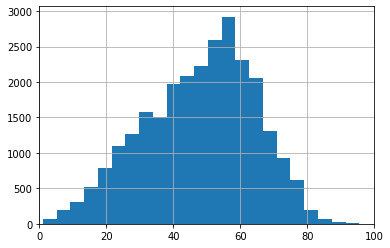

In [5]:
xray_class.df["Patient Age"].hist(bins=100).set_xlim(0,100)

In [6]:
# decide which one we want to take in terms of relating to other features.

"""
xray_class.df = xray_class.df[xray_class.df["Patient Gender"] == GENDER]
"""

xray_class.df = xray_class.df[xray_class.df["View Position"] == POSITION]

# Pre-processing of images and label
- split dataframe accordingly with equal numbers of labels in test and train
- batches image
- show image

In [7]:
# Split them into training and validation using NUM_IMAGES 
train_df, valid_df = xray_class.get_test_train_split_data(len(xray_class.df))

In [8]:
# Create training and validation data batches using ImageDataGenerator
"""
train_data = xray_class.create_data_batches(X_train, y_train)
val_data = xray_class.create_data_batches(X_val, y_val, valid_data=True)
train_data.element_spec, val_data.element_spec
"""

train_data = xray_class.generate_image(train_df, augment=True)
val_data   = xray_class.generate_image(valid_df)

Found 12249 validated image filenames belonging to 2 classes.
Found 3063 validated image filenames belonging to 2 classes.


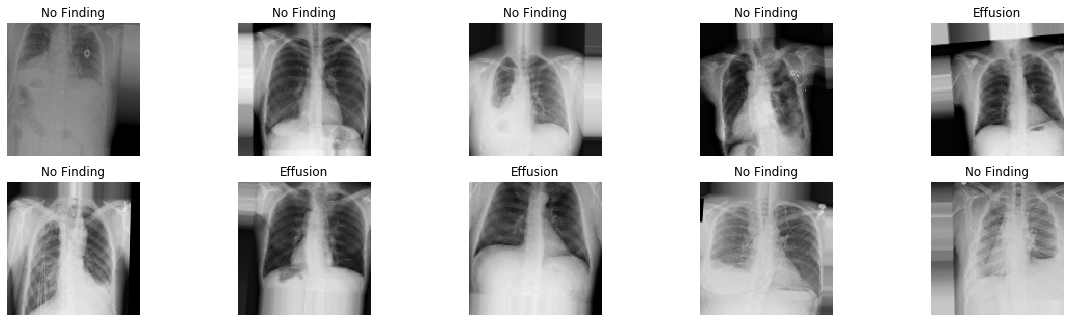

In [9]:
"""
train_images, train_labels = next(train_data.as_numpy_iterator())
xray_class.show_25_images(train_images, train_labels)
"""

train_images, train_labels = next(train_data)
xray_class.show_25_images(train_images, train_labels)

# Perform model trainining
- fit our data using Categorical classification with metrics of accuracy and optimization Adam
- validate data
- save our model

In [10]:
if xray_class.model_exist(SICKNESS, POSITION):
    model = xray_class.model_exist(SICKNESS, POSITION)
    a, b, c = model.evaluate(val_data)
else:
    model = xray_class.train_model(5, train_data, val_data) #(number of epoc, early stopping)
    a, b, c = model.evaluate(val_data)

    # save model
    xray_class.save_model(model, f"{SICKNESS}_{POSITION}_{round(a, 2)}_{round(b, 2)}")

  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 383 steps, validate for 96 steps
Epoch 1/5


 99/383 [======>.......................] - ETA: 42:29 - loss: 1.7861 - binary_accuracy: 0.6250 - categorical_accuracy: 0.625 - ETA: 21:30 - loss: 3.8427 - binary_accuracy: 0.5312 - categorical_accuracy: 0.531 - ETA: 14:30 - loss: 2.9478 - binary_accuracy: 0.6458 - categorical_accuracy: 0.645 - ETA: 11:08 - loss: 3.5193 - binary_accuracy: 0.6328 - categorical_accuracy: 0.632 - ETA: 9:48 - loss: 3.7565 - binary_accuracy: 0.6125 - categorical_accuracy: 0.612 - ETA: 8:56 - loss: 3.4398 - binary_accuracy: 0.6146 - categorical_accuracy: 0.61 - ETA: 8:18 - loss: 3.6905 - binary_accuracy: 0.5938 - categorical_accuracy: 0.59 - ETA: 7:49 - loss: 3.5952 - binary_accuracy: 0.5977 - categorical_accuracy: 0.59 - ETA: 7:26 - loss: 3.2984 - binary_accuracy: 0.6111 - categorical_accuracy: 0.61 - ETA: 7:09 - loss: 3.1962 - binary_accuracy: 0.6156 - categorical_accuracy: 0.61 - ETA: 6:55 - loss: 3.0596 - binary_accuracy: 0.6222 - categorical_accuracy: 0.62 - ETA: 6:42 - loss: 3.0598 - binary_accuracy: 0.

199/383 [==============>...............] - ETA: 3:43 - loss: 1.4376 - binary_accuracy: 0.6259 - categorical_accuracy: 0.62 - ETA: 3:42 - loss: 1.4274 - binary_accuracy: 0.6278 - categorical_accuracy: 0.62 - ETA: 3:41 - loss: 1.4202 - binary_accuracy: 0.6284 - categorical_accuracy: 0.62 - ETA: 3:40 - loss: 1.4115 - binary_accuracy: 0.6305 - categorical_accuracy: 0.63 - ETA: 3:39 - loss: 1.4041 - binary_accuracy: 0.6304 - categorical_accuracy: 0.63 - ETA: 3:38 - loss: 1.3980 - binary_accuracy: 0.6298 - categorical_accuracy: 0.62 - ETA: 3:38 - loss: 1.3927 - binary_accuracy: 0.6288 - categorical_accuracy: 0.62 - ETA: 3:37 - loss: 1.3861 - binary_accuracy: 0.6294 - categorical_accuracy: 0.62 - ETA: 3:36 - loss: 1.3807 - binary_accuracy: 0.6293 - categorical_accuracy: 0.62 - ETA: 3:35 - loss: 1.3740 - binary_accuracy: 0.6293 - categorical_accuracy: 0.62 - ETA: 3:34 - loss: 1.3675 - binary_accuracy: 0.6295 - categorical_accuracy: 0.62 - ETA: 3:33 - loss: 1.3596 - binary_accuracy: 0.6303 - ca

299/383 [======================>.......] - ETA: 2:21 - loss: 1.0467 - binary_accuracy: 0.6523 - categorical_accuracy: 0.65 - ETA: 2:20 - loss: 1.0449 - binary_accuracy: 0.6527 - categorical_accuracy: 0.65 - ETA: 2:19 - loss: 1.0427 - binary_accuracy: 0.6533 - categorical_accuracy: 0.65 - ETA: 2:19 - loss: 1.0402 - binary_accuracy: 0.6533 - categorical_accuracy: 0.65 - ETA: 2:18 - loss: 1.0378 - binary_accuracy: 0.6536 - categorical_accuracy: 0.65 - ETA: 2:17 - loss: 1.0350 - binary_accuracy: 0.6541 - categorical_accuracy: 0.65 - ETA: 2:16 - loss: 1.0326 - binary_accuracy: 0.6543 - categorical_accuracy: 0.65 - ETA: 2:15 - loss: 1.0306 - binary_accuracy: 0.6543 - categorical_accuracy: 0.65 - ETA: 2:15 - loss: 1.0279 - binary_accuracy: 0.6549 - categorical_accuracy: 0.65 - ETA: 2:14 - loss: 1.0260 - binary_accuracy: 0.6551 - categorical_accuracy: 0.65 - ETA: 2:13 - loss: 1.0236 - binary_accuracy: 0.6557 - categorical_accuracy: 0.65 - ETA: 2:12 - loss: 1.0211 - binary_accuracy: 0.6562 - ca

383/383 [==============================] - ETA: 1:03 - loss: 0.8902 - binary_accuracy: 0.6769 - categorical_accuracy: 0.67 - ETA: 1:03 - loss: 0.8892 - binary_accuracy: 0.6769 - categorical_accuracy: 0.67 - ETA: 1:02 - loss: 0.8884 - binary_accuracy: 0.6768 - categorical_accuracy: 0.67 - ETA: 1:01 - loss: 0.8871 - binary_accuracy: 0.6770 - categorical_accuracy: 0.67 - ETA: 1:00 - loss: 0.8858 - binary_accuracy: 0.6770 - categorical_accuracy: 0.67 - ETA: 1:00 - loss: 0.8850 - binary_accuracy: 0.6769 - categorical_accuracy: 0.67 - ETA: 59s - loss: 0.8834 - binary_accuracy: 0.6777 - categorical_accuracy: 0.6777 - ETA: 58s - loss: 0.8822 - binary_accuracy: 0.6780 - categorical_accuracy: 0.678 - ETA: 57s - loss: 0.8808 - binary_accuracy: 0.6784 - categorical_accuracy: 0.678 - ETA: 56s - loss: 0.8792 - binary_accuracy: 0.6787 - categorical_accuracy: 0.678 - ETA: 56s - loss: 0.8777 - binary_accuracy: 0.6789 - categorical_accuracy: 0.678 - ETA: 55s - loss: 0.8767 - binary_accuracy: 0.6788 - ca

100/383 [======>.......................] - ETA: 4:48 - loss: 0.4096 - binary_accuracy: 0.8438 - categorical_accuracy: 0.84 - ETA: 4:25 - loss: 0.5192 - binary_accuracy: 0.7969 - categorical_accuracy: 0.79 - ETA: 4:19 - loss: 0.5251 - binary_accuracy: 0.7812 - categorical_accuracy: 0.78 - ETA: 4:16 - loss: 0.5214 - binary_accuracy: 0.7734 - categorical_accuracy: 0.77 - ETA: 4:14 - loss: 0.5434 - binary_accuracy: 0.7563 - categorical_accuracy: 0.75 - ETA: 4:11 - loss: 0.5804 - binary_accuracy: 0.7448 - categorical_accuracy: 0.74 - ETA: 4:10 - loss: 0.6122 - binary_accuracy: 0.7098 - categorical_accuracy: 0.70 - ETA: 4:08 - loss: 0.6149 - binary_accuracy: 0.7070 - categorical_accuracy: 0.70 - ETA: 4:07 - loss: 0.5884 - binary_accuracy: 0.7257 - categorical_accuracy: 0.72 - ETA: 4:06 - loss: 0.5861 - binary_accuracy: 0.7219 - categorical_accuracy: 0.72 - ETA: 4:05 - loss: 0.5850 - binary_accuracy: 0.7216 - categorical_accuracy: 0.72 - ETA: 4:03 - loss: 0.5816 - binary_accuracy: 0.7135 - ca

200/383 [==============>...............] - ETA: 3:03 - loss: 0.5612 - binary_accuracy: 0.7212 - categorical_accuracy: 0.72 - ETA: 3:02 - loss: 0.5619 - binary_accuracy: 0.7209 - categorical_accuracy: 0.72 - ETA: 3:01 - loss: 0.5640 - binary_accuracy: 0.7206 - categorical_accuracy: 0.72 - ETA: 3:01 - loss: 0.5652 - binary_accuracy: 0.7197 - categorical_accuracy: 0.71 - ETA: 3:00 - loss: 0.5643 - binary_accuracy: 0.7205 - categorical_accuracy: 0.72 - ETA: 2:59 - loss: 0.5634 - binary_accuracy: 0.7211 - categorical_accuracy: 0.72 - ETA: 2:59 - loss: 0.5629 - binary_accuracy: 0.7202 - categorical_accuracy: 0.72 - ETA: 2:58 - loss: 0.5612 - binary_accuracy: 0.7214 - categorical_accuracy: 0.72 - ETA: 2:58 - loss: 0.5638 - binary_accuracy: 0.7199 - categorical_accuracy: 0.71 - ETA: 2:57 - loss: 0.5639 - binary_accuracy: 0.7202 - categorical_accuracy: 0.72 - ETA: 2:56 - loss: 0.5641 - binary_accuracy: 0.7205 - categorical_accuracy: 0.72 - ETA: 2:56 - loss: 0.5644 - binary_accuracy: 0.7199 - ca

300/383 [======================>.......] - ETA: 2:07 - loss: 0.5689 - binary_accuracy: 0.7214 - categorical_accuracy: 0.72 - ETA: 2:07 - loss: 0.5682 - binary_accuracy: 0.7217 - categorical_accuracy: 0.72 - ETA: 2:06 - loss: 0.5679 - binary_accuracy: 0.7225 - categorical_accuracy: 0.72 - ETA: 2:05 - loss: 0.5674 - binary_accuracy: 0.7227 - categorical_accuracy: 0.72 - ETA: 2:05 - loss: 0.5673 - binary_accuracy: 0.7229 - categorical_accuracy: 0.72 - ETA: 2:04 - loss: 0.5676 - binary_accuracy: 0.7229 - categorical_accuracy: 0.72 - ETA: 2:03 - loss: 0.5674 - binary_accuracy: 0.7228 - categorical_accuracy: 0.72 - ETA: 2:03 - loss: 0.5669 - binary_accuracy: 0.7231 - categorical_accuracy: 0.72 - ETA: 2:02 - loss: 0.5662 - binary_accuracy: 0.7237 - categorical_accuracy: 0.72 - ETA: 2:01 - loss: 0.5660 - binary_accuracy: 0.7243 - categorical_accuracy: 0.72 - ETA: 2:01 - loss: 0.5667 - binary_accuracy: 0.7238 - categorical_accuracy: 0.72 - ETA: 2:00 - loss: 0.5660 - binary_accuracy: 0.7245 - ca

383/383 [==============================] - ETA: 57s - loss: 0.5620 - binary_accuracy: 0.7274 - categorical_accuracy: 0.727 - ETA: 56s - loss: 0.5623 - binary_accuracy: 0.7272 - categorical_accuracy: 0.727 - ETA: 56s - loss: 0.5623 - binary_accuracy: 0.7273 - categorical_accuracy: 0.727 - ETA: 55s - loss: 0.5621 - binary_accuracy: 0.7277 - categorical_accuracy: 0.727 - ETA: 54s - loss: 0.5617 - binary_accuracy: 0.7281 - categorical_accuracy: 0.728 - ETA: 54s - loss: 0.5615 - binary_accuracy: 0.7278 - categorical_accuracy: 0.727 - ETA: 53s - loss: 0.5616 - binary_accuracy: 0.7276 - categorical_accuracy: 0.727 - ETA: 52s - loss: 0.5620 - binary_accuracy: 0.7275 - categorical_accuracy: 0.727 - ETA: 51s - loss: 0.5617 - binary_accuracy: 0.7278 - categorical_accuracy: 0.727 - ETA: 51s - loss: 0.5610 - binary_accuracy: 0.7283 - categorical_accuracy: 0.728 - ETA: 50s - loss: 0.5611 - binary_accuracy: 0.7281 - categorical_accuracy: 0.728 - ETA: 49s - loss: 0.5610 - binary_accuracy: 0.7282 - cat

100/383 [======>.......................] - ETA: 5:12 - loss: 0.4921 - binary_accuracy: 0.7812 - categorical_accuracy: 0.78 - ETA: 4:45 - loss: 0.5328 - binary_accuracy: 0.7188 - categorical_accuracy: 0.71 - ETA: 4:36 - loss: 0.5425 - binary_accuracy: 0.6979 - categorical_accuracy: 0.69 - ETA: 4:30 - loss: 0.5695 - binary_accuracy: 0.6875 - categorical_accuracy: 0.68 - ETA: 4:27 - loss: 0.5697 - binary_accuracy: 0.6875 - categorical_accuracy: 0.68 - ETA: 4:27 - loss: 0.5513 - binary_accuracy: 0.7083 - categorical_accuracy: 0.70 - ETA: 4:24 - loss: 0.5569 - binary_accuracy: 0.7188 - categorical_accuracy: 0.71 - ETA: 4:24 - loss: 0.5356 - binary_accuracy: 0.7383 - categorical_accuracy: 0.73 - ETA: 4:22 - loss: 0.5420 - binary_accuracy: 0.7326 - categorical_accuracy: 0.73 - ETA: 4:20 - loss: 0.5300 - binary_accuracy: 0.7437 - categorical_accuracy: 0.74 - ETA: 4:19 - loss: 0.5468 - binary_accuracy: 0.7330 - categorical_accuracy: 0.73 - ETA: 4:19 - loss: 0.5407 - binary_accuracy: 0.7344 - ca

200/383 [==============>...............] - ETA: 3:15 - loss: 0.5365 - binary_accuracy: 0.7472 - categorical_accuracy: 0.74 - ETA: 3:14 - loss: 0.5350 - binary_accuracy: 0.7482 - categorical_accuracy: 0.74 - ETA: 3:13 - loss: 0.5341 - binary_accuracy: 0.7488 - categorical_accuracy: 0.74 - ETA: 3:12 - loss: 0.5360 - binary_accuracy: 0.7482 - categorical_accuracy: 0.74 - ETA: 3:11 - loss: 0.5367 - binary_accuracy: 0.7473 - categorical_accuracy: 0.74 - ETA: 3:10 - loss: 0.5394 - binary_accuracy: 0.7453 - categorical_accuracy: 0.74 - ETA: 3:10 - loss: 0.5390 - binary_accuracy: 0.7453 - categorical_accuracy: 0.74 - ETA: 3:09 - loss: 0.5405 - binary_accuracy: 0.7448 - categorical_accuracy: 0.74 - ETA: 3:08 - loss: 0.5418 - binary_accuracy: 0.7437 - categorical_accuracy: 0.74 - ETA: 3:07 - loss: 0.5397 - binary_accuracy: 0.7455 - categorical_accuracy: 0.74 - ETA: 3:06 - loss: 0.5417 - binary_accuracy: 0.7438 - categorical_accuracy: 0.74 - ETA: 3:06 - loss: 0.5416 - binary_accuracy: 0.7439 - ca

300/383 [======================>.......] - ETA: 2:04 - loss: 0.5432 - binary_accuracy: 0.7413 - categorical_accuracy: 0.74 - ETA: 2:04 - loss: 0.5427 - binary_accuracy: 0.7414 - categorical_accuracy: 0.74 - ETA: 2:03 - loss: 0.5425 - binary_accuracy: 0.7417 - categorical_accuracy: 0.74 - ETA: 2:02 - loss: 0.5419 - binary_accuracy: 0.7421 - categorical_accuracy: 0.74 - ETA: 2:02 - loss: 0.5423 - binary_accuracy: 0.7423 - categorical_accuracy: 0.74 - ETA: 2:01 - loss: 0.5422 - binary_accuracy: 0.7421 - categorical_accuracy: 0.74 - ETA: 2:00 - loss: 0.5420 - binary_accuracy: 0.7425 - categorical_accuracy: 0.74 - ETA: 2:00 - loss: 0.5428 - binary_accuracy: 0.7418 - categorical_accuracy: 0.74 - ETA: 1:59 - loss: 0.5427 - binary_accuracy: 0.7417 - categorical_accuracy: 0.74 - ETA: 1:58 - loss: 0.5424 - binary_accuracy: 0.7417 - categorical_accuracy: 0.74 - ETA: 1:58 - loss: 0.5426 - binary_accuracy: 0.7414 - categorical_accuracy: 0.74 - ETA: 1:57 - loss: 0.5438 - binary_accuracy: 0.7404 - ca

383/383 [==============================] - ETA: 56s - loss: 0.5456 - binary_accuracy: 0.7390 - categorical_accuracy: 0.739 - ETA: 56s - loss: 0.5456 - binary_accuracy: 0.7394 - categorical_accuracy: 0.739 - ETA: 55s - loss: 0.5455 - binary_accuracy: 0.7396 - categorical_accuracy: 0.739 - ETA: 54s - loss: 0.5446 - binary_accuracy: 0.7404 - categorical_accuracy: 0.740 - ETA: 53s - loss: 0.5446 - binary_accuracy: 0.7404 - categorical_accuracy: 0.740 - ETA: 53s - loss: 0.5447 - binary_accuracy: 0.7403 - categorical_accuracy: 0.740 - ETA: 52s - loss: 0.5454 - binary_accuracy: 0.7399 - categorical_accuracy: 0.739 - ETA: 51s - loss: 0.5454 - binary_accuracy: 0.7404 - categorical_accuracy: 0.740 - ETA: 51s - loss: 0.5454 - binary_accuracy: 0.7406 - categorical_accuracy: 0.740 - ETA: 50s - loss: 0.5445 - binary_accuracy: 0.7412 - categorical_accuracy: 0.741 - ETA: 49s - loss: 0.5443 - binary_accuracy: 0.7412 - categorical_accuracy: 0.741 - ETA: 49s - loss: 0.5444 - binary_accuracy: 0.7411 - cat

100/383 [======>.......................] - ETA: 4:49 - loss: 0.3996 - binary_accuracy: 0.8125 - categorical_accuracy: 0.81 - ETA: 4:26 - loss: 0.4532 - binary_accuracy: 0.7969 - categorical_accuracy: 0.79 - ETA: 4:19 - loss: 0.4732 - binary_accuracy: 0.7708 - categorical_accuracy: 0.77 - ETA: 4:20 - loss: 0.4629 - binary_accuracy: 0.7812 - categorical_accuracy: 0.78 - ETA: 4:21 - loss: 0.4770 - binary_accuracy: 0.7625 - categorical_accuracy: 0.76 - ETA: 4:21 - loss: 0.4746 - binary_accuracy: 0.7708 - categorical_accuracy: 0.77 - ETA: 4:18 - loss: 0.4945 - binary_accuracy: 0.7634 - categorical_accuracy: 0.76 - ETA: 4:16 - loss: 0.5210 - binary_accuracy: 0.7422 - categorical_accuracy: 0.74 - ETA: 4:13 - loss: 0.5215 - binary_accuracy: 0.7500 - categorical_accuracy: 0.75 - ETA: 4:12 - loss: 0.5280 - binary_accuracy: 0.7531 - categorical_accuracy: 0.75 - ETA: 4:10 - loss: 0.5315 - binary_accuracy: 0.7500 - categorical_accuracy: 0.75 - ETA: 4:08 - loss: 0.5367 - binary_accuracy: 0.7448 - ca

200/383 [==============>...............] - ETA: 3:09 - loss: 0.5386 - binary_accuracy: 0.7413 - categorical_accuracy: 0.74 - ETA: 3:08 - loss: 0.5376 - binary_accuracy: 0.7417 - categorical_accuracy: 0.74 - ETA: 3:08 - loss: 0.5402 - binary_accuracy: 0.7409 - categorical_accuracy: 0.74 - ETA: 3:07 - loss: 0.5398 - binary_accuracy: 0.7410 - categorical_accuracy: 0.74 - ETA: 3:07 - loss: 0.5408 - binary_accuracy: 0.7393 - categorical_accuracy: 0.73 - ETA: 3:07 - loss: 0.5419 - binary_accuracy: 0.7385 - categorical_accuracy: 0.73 - ETA: 3:07 - loss: 0.5413 - binary_accuracy: 0.7386 - categorical_accuracy: 0.73 - ETA: 3:07 - loss: 0.5425 - binary_accuracy: 0.7381 - categorical_accuracy: 0.73 - ETA: 3:06 - loss: 0.5442 - binary_accuracy: 0.7380 - categorical_accuracy: 0.73 - ETA: 3:06 - loss: 0.5430 - binary_accuracy: 0.7384 - categorical_accuracy: 0.73 - ETA: 3:05 - loss: 0.5431 - binary_accuracy: 0.7379 - categorical_accuracy: 0.73 - ETA: 3:04 - loss: 0.5441 - binary_accuracy: 0.7374 - ca

300/383 [======================>.......] - ETA: 2:04 - loss: 0.5381 - binary_accuracy: 0.7438 - categorical_accuracy: 0.74 - ETA: 2:04 - loss: 0.5384 - binary_accuracy: 0.7435 - categorical_accuracy: 0.74 - ETA: 2:03 - loss: 0.5386 - binary_accuracy: 0.7434 - categorical_accuracy: 0.74 - ETA: 2:02 - loss: 0.5383 - binary_accuracy: 0.7434 - categorical_accuracy: 0.74 - ETA: 2:02 - loss: 0.5377 - binary_accuracy: 0.7441 - categorical_accuracy: 0.74 - ETA: 2:01 - loss: 0.5378 - binary_accuracy: 0.7435 - categorical_accuracy: 0.74 - ETA: 2:00 - loss: 0.5378 - binary_accuracy: 0.7438 - categorical_accuracy: 0.74 - ETA: 2:00 - loss: 0.5375 - binary_accuracy: 0.7440 - categorical_accuracy: 0.74 - ETA: 1:59 - loss: 0.5374 - binary_accuracy: 0.7443 - categorical_accuracy: 0.74 - ETA: 1:58 - loss: 0.5375 - binary_accuracy: 0.7439 - categorical_accuracy: 0.74 - ETA: 1:57 - loss: 0.5368 - binary_accuracy: 0.7442 - categorical_accuracy: 0.74 - ETA: 1:57 - loss: 0.5370 - binary_accuracy: 0.7441 - ca

383/383 [==============================] - ETA: 56s - loss: 0.5360 - binary_accuracy: 0.7455 - categorical_accuracy: 0.745 - ETA: 55s - loss: 0.5358 - binary_accuracy: 0.7457 - categorical_accuracy: 0.745 - ETA: 55s - loss: 0.5357 - binary_accuracy: 0.7459 - categorical_accuracy: 0.745 - ETA: 54s - loss: 0.5353 - binary_accuracy: 0.7463 - categorical_accuracy: 0.746 - ETA: 53s - loss: 0.5351 - binary_accuracy: 0.7465 - categorical_accuracy: 0.746 - ETA: 53s - loss: 0.5349 - binary_accuracy: 0.7463 - categorical_accuracy: 0.746 - ETA: 52s - loss: 0.5347 - binary_accuracy: 0.7465 - categorical_accuracy: 0.746 - ETA: 51s - loss: 0.5349 - binary_accuracy: 0.7462 - categorical_accuracy: 0.746 - ETA: 51s - loss: 0.5344 - binary_accuracy: 0.7466 - categorical_accuracy: 0.746 - ETA: 50s - loss: 0.5339 - binary_accuracy: 0.7468 - categorical_accuracy: 0.746 - ETA: 49s - loss: 0.5346 - binary_accuracy: 0.7463 - categorical_accuracy: 0.746 - ETA: 49s - loss: 0.5351 - binary_accuracy: 0.7460 - cat

100/383 [======>.......................] - ETA: 5:31 - loss: 0.6323 - binary_accuracy: 0.7188 - categorical_accuracy: 0.71 - ETA: 5:03 - loss: 0.5035 - binary_accuracy: 0.7812 - categorical_accuracy: 0.78 - ETA: 4:51 - loss: 0.5234 - binary_accuracy: 0.7917 - categorical_accuracy: 0.79 - ETA: 4:45 - loss: 0.5138 - binary_accuracy: 0.7812 - categorical_accuracy: 0.78 - ETA: 4:41 - loss: 0.5074 - binary_accuracy: 0.7812 - categorical_accuracy: 0.78 - ETA: 4:40 - loss: 0.5491 - binary_accuracy: 0.7656 - categorical_accuracy: 0.76 - ETA: 4:37 - loss: 0.5293 - binary_accuracy: 0.7679 - categorical_accuracy: 0.76 - ETA: 4:36 - loss: 0.5433 - binary_accuracy: 0.7617 - categorical_accuracy: 0.76 - ETA: 4:34 - loss: 0.5487 - binary_accuracy: 0.7569 - categorical_accuracy: 0.75 - ETA: 4:33 - loss: 0.5542 - binary_accuracy: 0.7500 - categorical_accuracy: 0.75 - ETA: 4:32 - loss: 0.5503 - binary_accuracy: 0.7528 - categorical_accuracy: 0.75 - ETA: 4:32 - loss: 0.5482 - binary_accuracy: 0.7604 - ca

200/383 [==============>...............] - ETA: 3:24 - loss: 0.5313 - binary_accuracy: 0.7513 - categorical_accuracy: 0.75 - ETA: 3:23 - loss: 0.5314 - binary_accuracy: 0.7519 - categorical_accuracy: 0.75 - ETA: 3:23 - loss: 0.5322 - binary_accuracy: 0.7516 - categorical_accuracy: 0.75 - ETA: 3:22 - loss: 0.5332 - binary_accuracy: 0.7507 - categorical_accuracy: 0.75 - ETA: 3:21 - loss: 0.5334 - binary_accuracy: 0.7504 - categorical_accuracy: 0.75 - ETA: 3:20 - loss: 0.5328 - binary_accuracy: 0.7516 - categorical_accuracy: 0.75 - ETA: 3:20 - loss: 0.5310 - binary_accuracy: 0.7524 - categorical_accuracy: 0.75 - ETA: 3:19 - loss: 0.5307 - binary_accuracy: 0.7533 - categorical_accuracy: 0.75 - ETA: 3:18 - loss: 0.5300 - binary_accuracy: 0.7544 - categorical_accuracy: 0.75 - ETA: 3:17 - loss: 0.5305 - binary_accuracy: 0.7541 - categorical_accuracy: 0.75 - ETA: 3:17 - loss: 0.5285 - binary_accuracy: 0.7551 - categorical_accuracy: 0.75 - ETA: 3:16 - loss: 0.5276 - binary_accuracy: 0.7554 - ca

300/383 [======================>.......] - ETA: 2:12 - loss: 0.5233 - binary_accuracy: 0.7594 - categorical_accuracy: 0.75 - ETA: 2:11 - loss: 0.5233 - binary_accuracy: 0.7592 - categorical_accuracy: 0.75 - ETA: 2:10 - loss: 0.5241 - binary_accuracy: 0.7588 - categorical_accuracy: 0.75 - ETA: 2:10 - loss: 0.5237 - binary_accuracy: 0.7589 - categorical_accuracy: 0.75 - ETA: 2:09 - loss: 0.5234 - binary_accuracy: 0.7593 - categorical_accuracy: 0.75 - ETA: 2:08 - loss: 0.5231 - binary_accuracy: 0.7593 - categorical_accuracy: 0.75 - ETA: 2:07 - loss: 0.5221 - binary_accuracy: 0.7605 - categorical_accuracy: 0.76 - ETA: 2:07 - loss: 0.5229 - binary_accuracy: 0.7597 - categorical_accuracy: 0.75 - ETA: 2:06 - loss: 0.5235 - binary_accuracy: 0.7598 - categorical_accuracy: 0.75 - ETA: 2:05 - loss: 0.5236 - binary_accuracy: 0.7599 - categorical_accuracy: 0.75 - ETA: 2:04 - loss: 0.5248 - binary_accuracy: 0.7592 - categorical_accuracy: 0.75 - ETA: 2:04 - loss: 0.5247 - binary_accuracy: 0.7587 - ca

383/383 [==============================] - ETA: 1:01 - loss: 0.5272 - binary_accuracy: 0.7570 - categorical_accuracy: 0.75 - ETA: 1:00 - loss: 0.5272 - binary_accuracy: 0.7570 - categorical_accuracy: 0.75 - ETA: 59s - loss: 0.5273 - binary_accuracy: 0.7567 - categorical_accuracy: 0.7567 - ETA: 59s - loss: 0.5268 - binary_accuracy: 0.7572 - categorical_accuracy: 0.757 - ETA: 58s - loss: 0.5268 - binary_accuracy: 0.7571 - categorical_accuracy: 0.757 - ETA: 57s - loss: 0.5267 - binary_accuracy: 0.7575 - categorical_accuracy: 0.757 - ETA: 56s - loss: 0.5265 - binary_accuracy: 0.7579 - categorical_accuracy: 0.757 - ETA: 56s - loss: 0.5268 - binary_accuracy: 0.7574 - categorical_accuracy: 0.757 - ETA: 55s - loss: 0.5270 - binary_accuracy: 0.7574 - categorical_accuracy: 0.757 - ETA: 54s - loss: 0.5271 - binary_accuracy: 0.7573 - categorical_accuracy: 0.757 - ETA: 53s - loss: 0.5271 - binary_accuracy: 0.7576 - categorical_accuracy: 0.757 - ETA: 53s - loss: 0.5268 - binary_accuracy: 0.7575 - ca

  ...
    to  
  ['...']


96/96 [==============================] - ETA: 1:03 - loss: 0.5053 - binary_accuracy: 0.7812 - categorical_accuracy: 0.78 - ETA: 56s - loss: 0.5614 - binary_accuracy: 0.7344 - categorical_accuracy: 0.7344 - ETA: 54s - loss: 0.5363 - binary_accuracy: 0.7604 - categorical_accuracy: 0.760 - ETA: 53s - loss: 0.5400 - binary_accuracy: 0.7578 - categorical_accuracy: 0.757 - ETA: 52s - loss: 0.5323 - binary_accuracy: 0.7875 - categorical_accuracy: 0.787 - ETA: 51s - loss: 0.5149 - binary_accuracy: 0.7917 - categorical_accuracy: 0.791 - ETA: 51s - loss: 0.5162 - binary_accuracy: 0.7991 - categorical_accuracy: 0.799 - ETA: 50s - loss: 0.5225 - binary_accuracy: 0.7812 - categorical_accuracy: 0.781 - ETA: 49s - loss: 0.5181 - binary_accuracy: 0.7812 - categorical_accuracy: 0.781 - ETA: 48s - loss: 0.5174 - binary_accuracy: 0.7719 - categorical_accuracy: 0.771 - ETA: 48s - loss: 0.5203 - binary_accuracy: 0.7727 - categorical_accuracy: 0.772 - ETA: 47s - loss: 0.5194 - binary_accuracy: 0.7786 - cate

In [11]:
# Make predictions on the validation data (not used to train on)
predictions = model.predict(val_data, verbose=1) # verbose shows us how long there is to go

96/96 [==============================] - ETA: 3: - ETA: 2: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 58s - ETA: 57 - ETA: 56 - ETA: 54 - ETA: 53 - ETA: 52 - ETA: 51 - ETA: 50 - ETA: 49 - ETA: 48 - ETA: 47 - ETA: 46 - ETA: 46 - ETA: 45 - ETA: 44 - ETA: 43 - ETA: 43 - ETA: 42 - ETA: 41 - ETA: 40 - ETA: 39 - ETA: 39 - ETA: 38 - ETA: 37 - ETA: 36 - ETA: 36 - ETA: 35 - ETA: 34 - ETA: 33 - ETA: 33 - ETA: 32 - ETA: 32 - ETA: 31 - ETA: 31 - ETA: 30 - ETA: 30 - ETA: 29 - ETA: 28 - ETA: 28 - ETA: 27 - ETA: 27 - ETA: 26 - ETA: 25 - ETA: 25 - ETA: 24 - ETA: 24 - ETA: 23 - ETA: 22 - ETA: 22 - ETA: 21 - ETA: 20 - ETA: 20 - ETA: 19 - ETA: 18 - ETA: 18 - ETA: 17 - ETA: 16 - ETA: 16 - ETA: 15 - ETA: 15 - ETA: 14 - ETA: 13 - ETA: 13 - ETA: 12 - ETA: 11 - ETA: 11 - ETA: 10 - ETA: 9 - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 62s 641ms/step


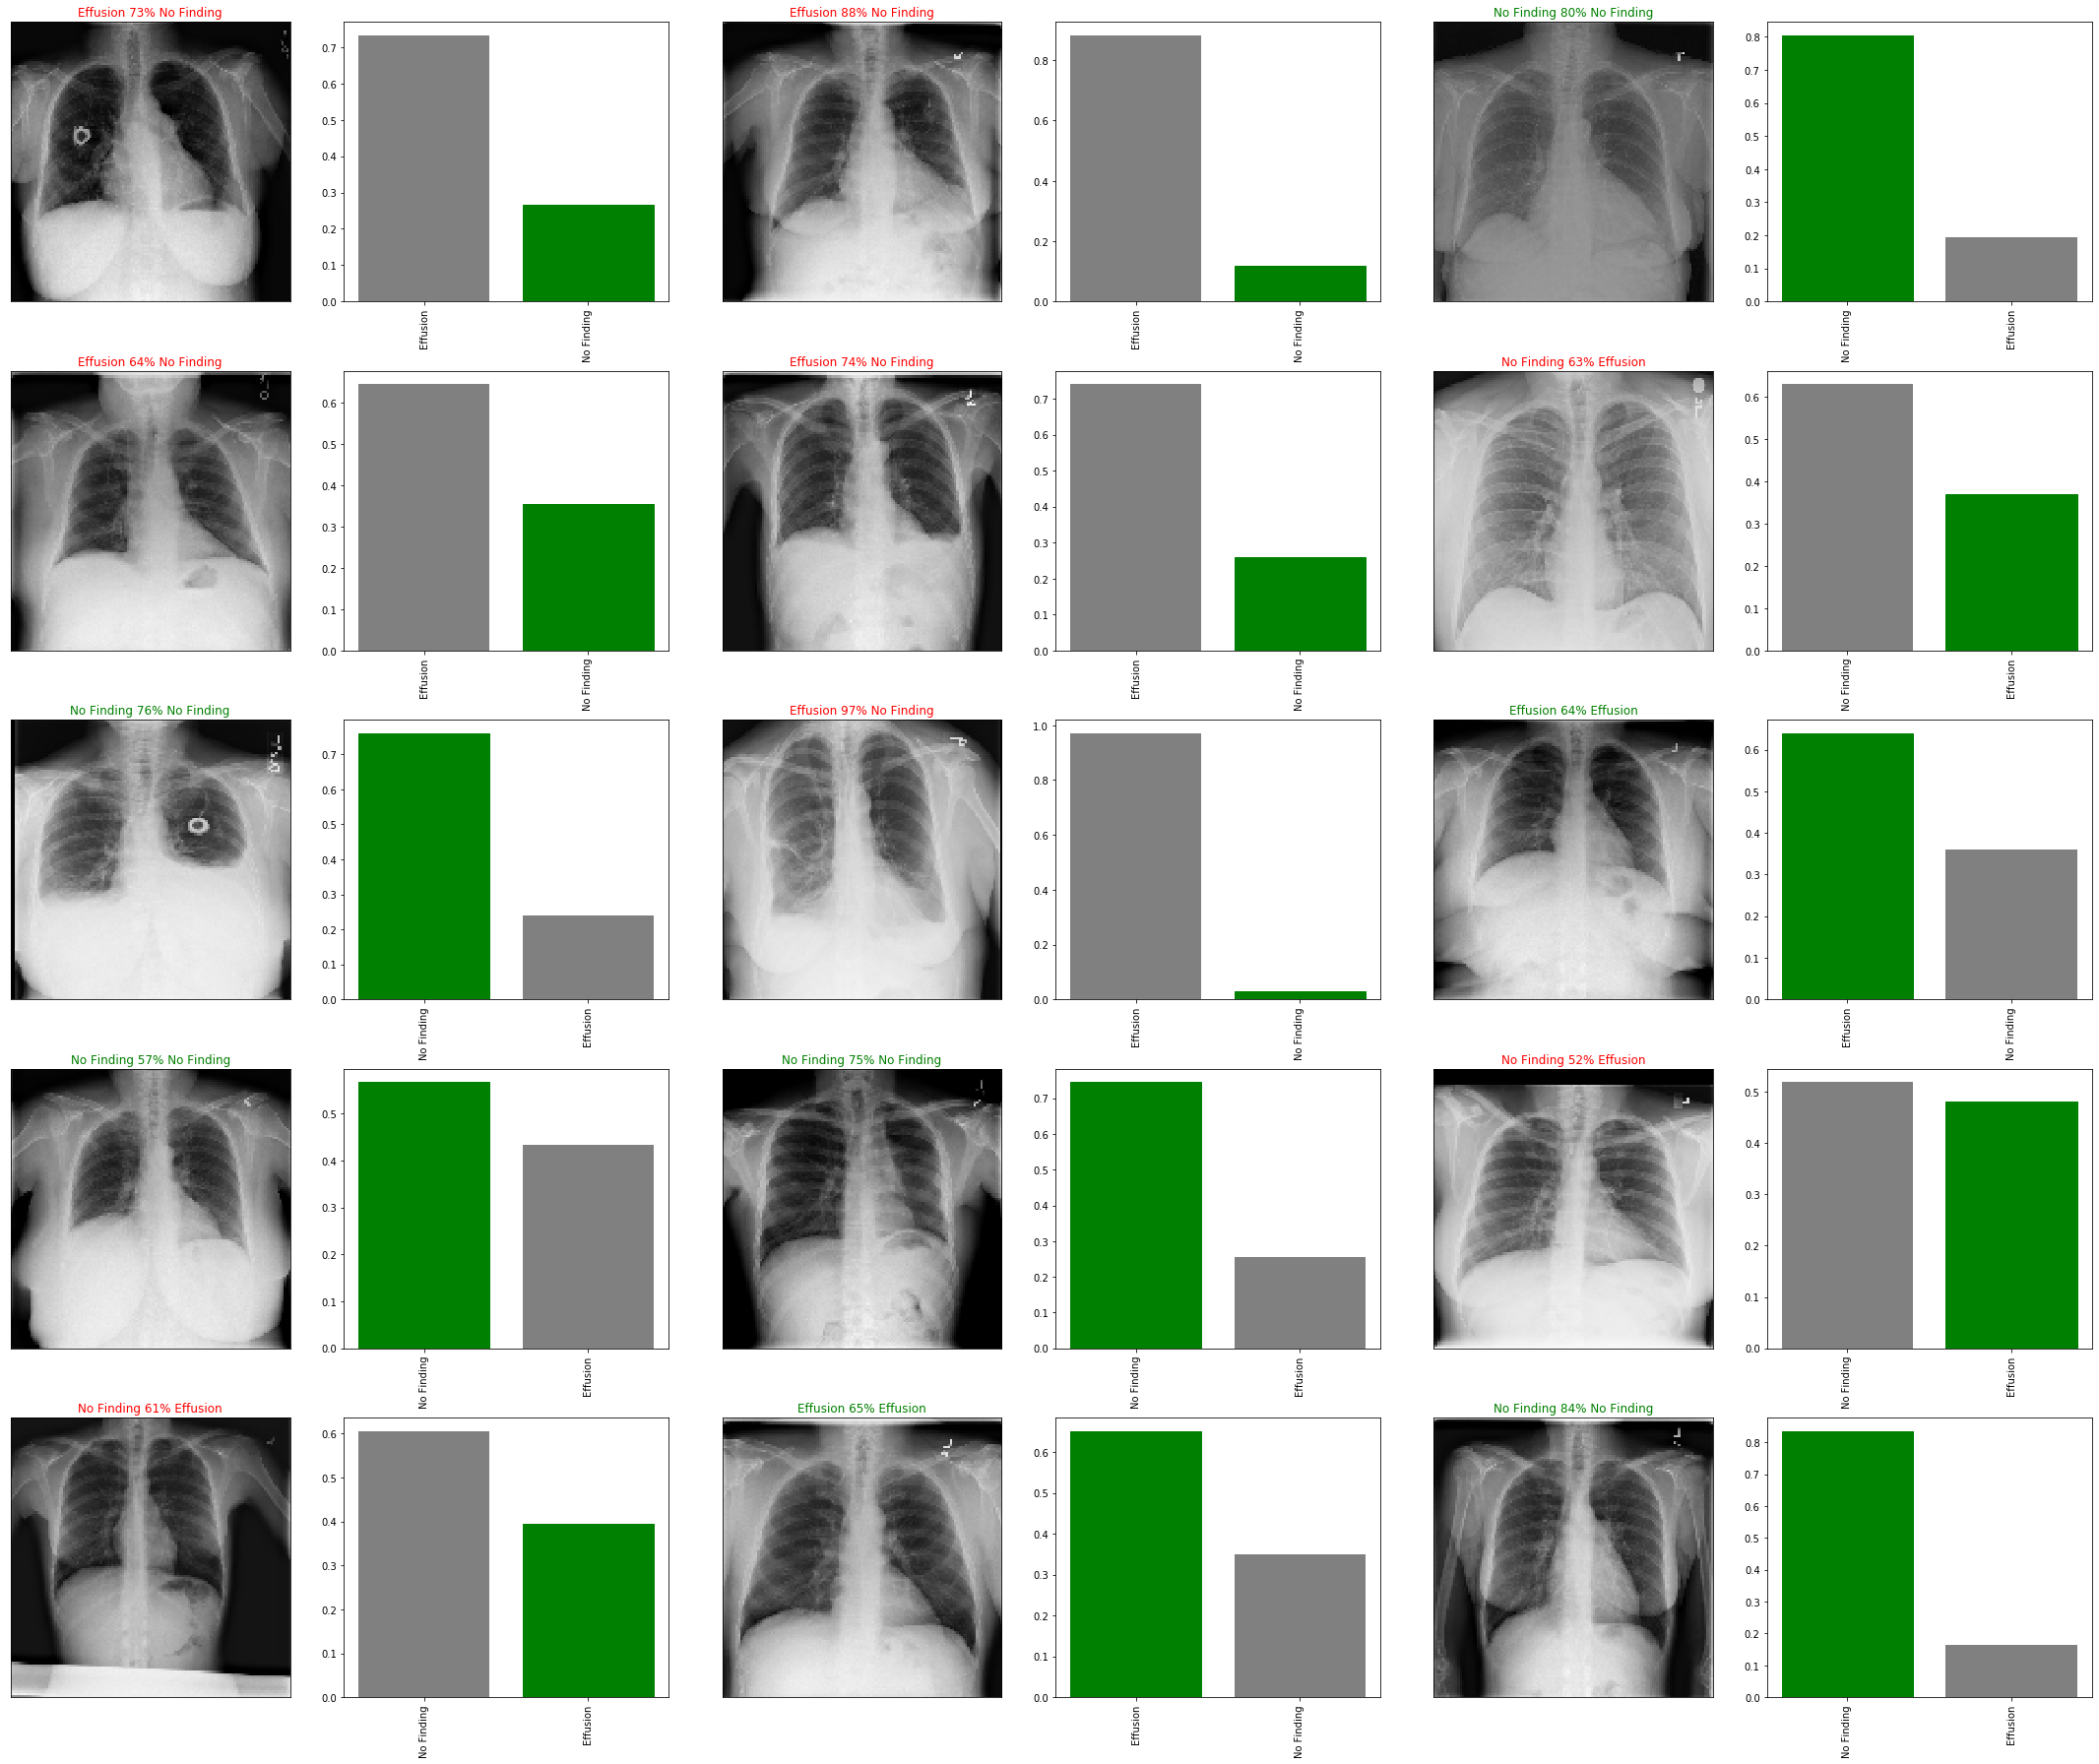

In [12]:
# Let's check a few predictions and their different values
val_images, val_labels = next(val_data)

i_multiplier = 0
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(5*2*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  xray_class.plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  xray_class.plot_pred_conf(prediction_probabilities=predictions,
                labels=val_labels,
                n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

# Evaluating our model
- confusion matrix
- classification report
- loss and accuracy

In [13]:
acc = round(b,2)
loss = round(a,2)
print(f"Loss : {loss}, Accuracy: {acc}")

Loss : 0.51, Accuracy: 0.7799999713897705


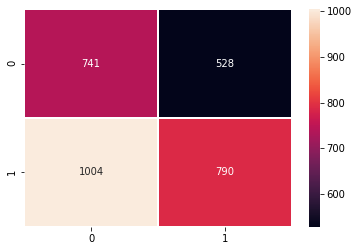

In [31]:
y_test = [xray_class.get_label(x) for x in predictions] # convert [0,25, 0.75] -> "No Finding/Effusion"
y_val = [xray_class.get_unique_labels()[x] for x in val_data.labels]

xray_class.generate_confusion_matrix(y_test, y_val)

In [45]:
xray_class.get_unique_labels()[np.argmax(predictions[0])]

'Effusion'

In [32]:
xray_class.generate_classification_report(y_test, y_val)

              precision    recall  f1-score   support

    Effusion       0.60      0.44      0.51      1794
  No Finding       0.42      0.58      0.49      1269

    accuracy                           0.50      3063
   macro avg       0.51      0.51      0.50      3063
weighted avg       0.53      0.50      0.50      3063

